In [118]:
import numpy as np

In [119]:
ml_residuals = np.loadtxt("../experiments/2d/ml/residuals_with_pressure_solver.dat")

In [120]:
mgpcg_residuals = np.loadtxt("../experiments/2d/mgpcg/residuals_with_pressure_solver.dat")

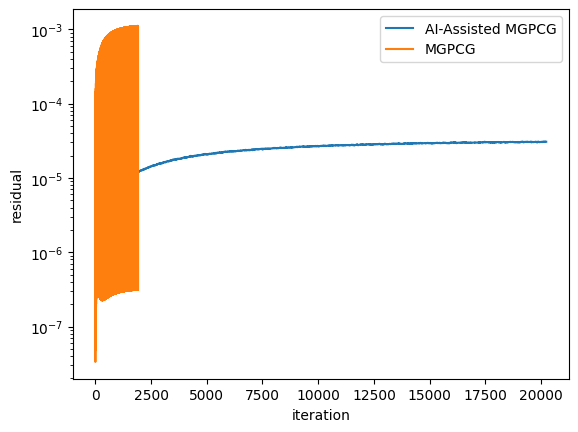

In [121]:
# plot the residuals
import matplotlib.pyplot as plt
plt.plot(ml_residuals, label="AI-Assisted MGPCG")
plt.plot(mgpcg_residuals, label="MGPCG")
plt.yscale('log')
plt.xlabel("iteration")
plt.ylabel("residual")
plt.legend()
plt.show()

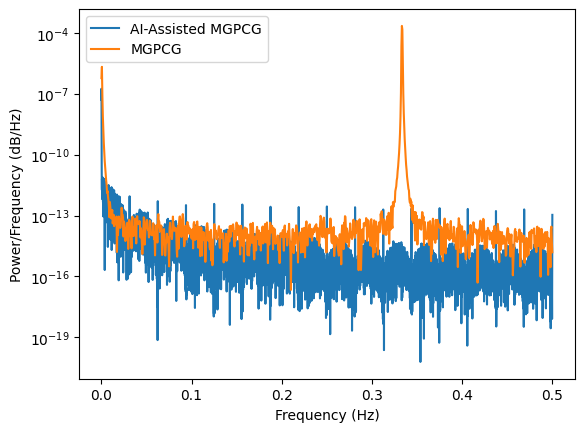

In [122]:
import matplotlib.pyplot as plt
from scipy.signal import welch

# Compute PSD using Welch method
ml_freq, ml_psd = welch(ml_residuals, fs=1.0, nperseg=len(ml_residuals))
mgpcg_freq, mgpcg_psd = welch(mgpcg_residuals, fs=1.0, nperseg=len(mgpcg_residuals))

# Plot the PSD
plt.semilogy(ml_freq, ml_psd, label="AI-Assisted MGPCG")
plt.semilogy(mgpcg_freq, mgpcg_psd, label="MGPCG")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.legend()
plt.show()


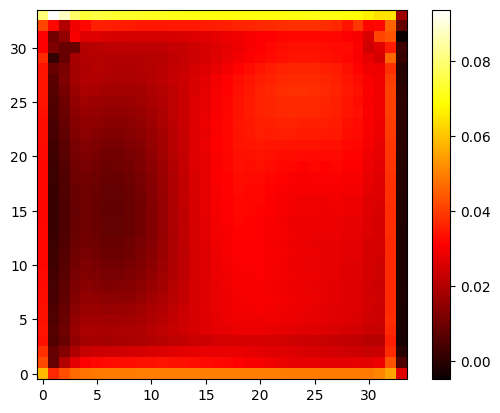

In [137]:
import torch

residual_data = np.loadtxt("../experiments/2d/mgpcg/ML_data/res_2.dat")
residual_data = torch.tensor(residual_data).to('cuda')

# load the torchscript model
model = torch.jit.load("model.pt")
model.eval()
with torch.no_grad():
    e_data = model(residual_data.float().unsqueeze(0).unsqueeze(0))
    # plot e_data as heatmap
    e_data = e_data.to('cpu')
    e_data = e_data.squeeze(0).squeeze(0)
    plt.imshow(e_data, cmap='hot', interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

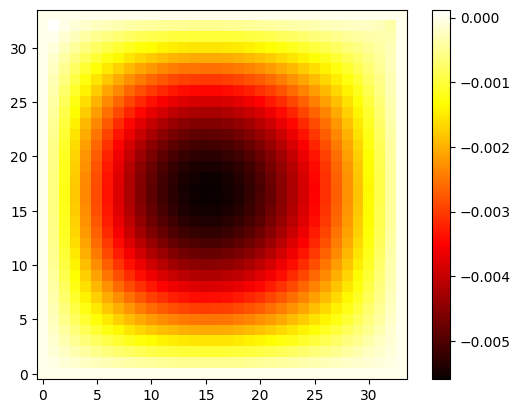

In [129]:
e_data = np.loadtxt("../experiments/2d/mgpcg/ML_data/e_600.dat")
# plot e_data as heatmap
plt.imshow(e_data, cmap='hot', interpolation='nearest')
# invert the y-axis
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

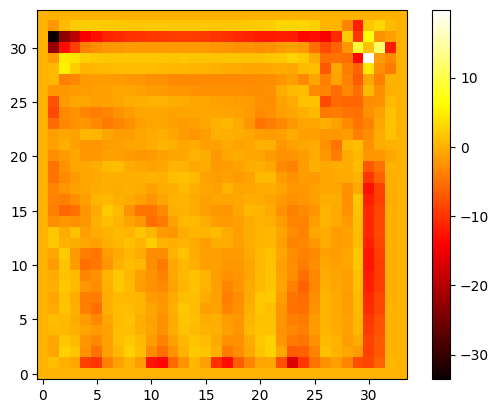

In [125]:
e_data = np.loadtxt("test.dat")
# plot e_data as heatmap
plt.imshow(e_data, cmap='hot', interpolation='nearest')
# invert the y-axis
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()